In [1]:
def generate_conversion_rate(prices):
    val = np.random.uniform(size=(len(prices)))
    conversion_rates = np.sort(val)[::-1]
    return conversion_rates

In [2]:
import matplotlib.pyplot as plt
from mab.environment import *
from mab.ts_learner import *
from mab.ucb_learner import *

#Customers
customerParams = zip([200,200,200,200], [50,50,50,50])
#discounts
discounts = np.array([0.0, 0.5, 0.10, 0.25])
#Conversion Rates for item 2 [discountedPrice x Class]
conv_rate2 = np.array([[0.1, 0.2, 0.15, 0.2],
                    [0.15, 0.25, 0.2, 0.25],
                    [0.2, 0.35, 0.25, 0.4],
                    [0.4, 0.45, 0.35, 0.6]])
                    
prices = [500, 690, 750, 850, 900]
arms = prices #TODO:change this value
n_classes = 4

conv_rate1 = generate_conversion_rate(prices)
 
max_conv = np.argmax(conv_rate1)

opt = conv_rate1[max_conv]
print(opt)

0.8267678890597581


In [3]:
n_experiments = 365
customerParams = zip([100,100,100,100], [10,10,10,10])
env = Environment(customerParams, discounts, prices, conv_rate1, conv_rate2)
ts_learner =TS_Learner(arms=arms)      
u_learner = UCB(n_arms=len(arms))

ts_rewards_per_class_per_day = [[] for i in range(n_classes)]
u_rewards_per_class_per_day = [[] for i in range(n_classes)]

for day in range(n_experiments):
    ts_rewards_per_experiment = [np.array([0]) for i in range(n_classes)]
    u_rewards_per_experiment = [np.array([0]) for i in range(n_classes)]
    for customer in range(np.max(env.customers)):
        to_be_updated = env.customers > customer

        ts_pulled_arms = ts_learner.pull_arm_per_class()
        ts_reward = env.round1_per_class(ts_pulled_arms)
        ts_learner.update(ts_pulled_arms, ts_reward, to_be_updated)
        ts_rewards_per_experiment = [np.append(ts_rewards_per_experiment[index], r) for index, r in enumerate(ts_reward)]

        u_pulled_arms = u_learner.pull_arm_per_class()
        u_reward = env.round1_per_class(u_pulled_arms)
        u_learner.update(u_pulled_arms, u_reward, to_be_updated)
        u_rewards_per_experiment = [np.append(u_rewards_per_experiment[index], r) for index, r in enumerate(u_reward)]

    for c in range (n_classes):
        ts_rewards_per_class_per_day[c].append([ts_rewards_per_experiment[c]])
        u_rewards_per_class_per_day[c].append([u_rewards_per_experiment[c]])

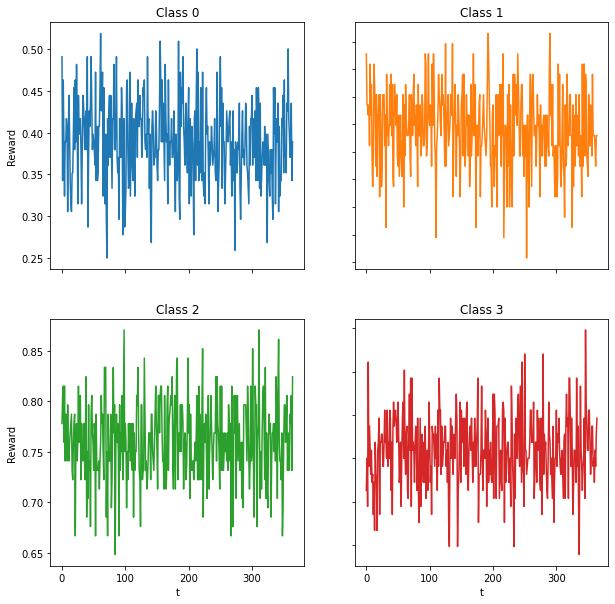

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(np.array([np.mean(x) for x in u_rewards_per_class_per_day[0]]))
axs[0, 0].set_title('Class 0')
axs[0, 1].plot(np.array([np.mean(x) for x in u_rewards_per_class_per_day[1]]), 'tab:orange')
axs[0, 1].set_title('Class 1')
axs[1, 0].plot(np.array([np.mean(x) for x in u_rewards_per_class_per_day[2]]), 'tab:green')
axs[1, 0].set_title('Class 2')
axs[1, 1].plot(np.array([np.mean(x) for x in u_rewards_per_class_per_day[3]]), 'tab:red')
axs[1, 1].set_title('Class 3')

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='Reward')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


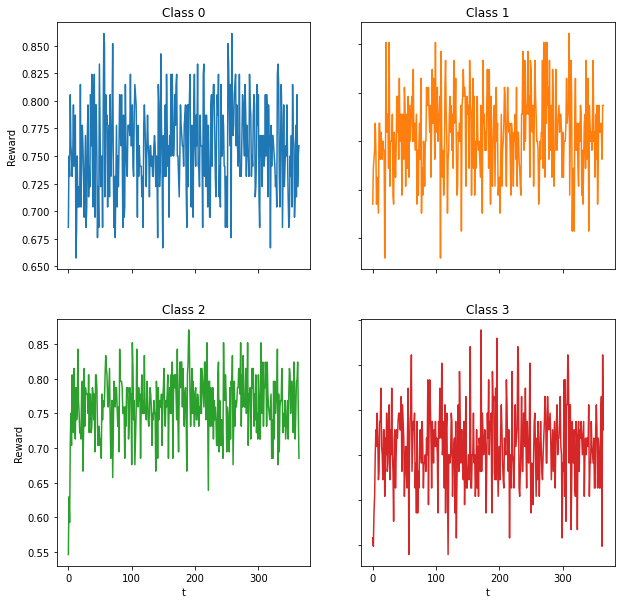

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(np.array([np.mean(x) for x in ts_rewards_per_class_per_day[0]]))
axs[0, 0].set_title('Class 0')
axs[0, 1].plot(np.array([np.mean(x) for x in ts_rewards_per_class_per_day[1]]), 'tab:orange')
axs[0, 1].set_title('Class 1')
axs[1, 0].plot(np.array([np.mean(x) for x in ts_rewards_per_class_per_day[2]]), 'tab:green')
axs[1, 0].set_title('Class 2')
axs[1, 1].plot(np.array([np.mean(x) for x in ts_rewards_per_class_per_day[3]]), 'tab:red')
axs[1, 1].set_title('Class 3')

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='Reward')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()